In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [2]:
df = pd.read_csv('insurance.csv')

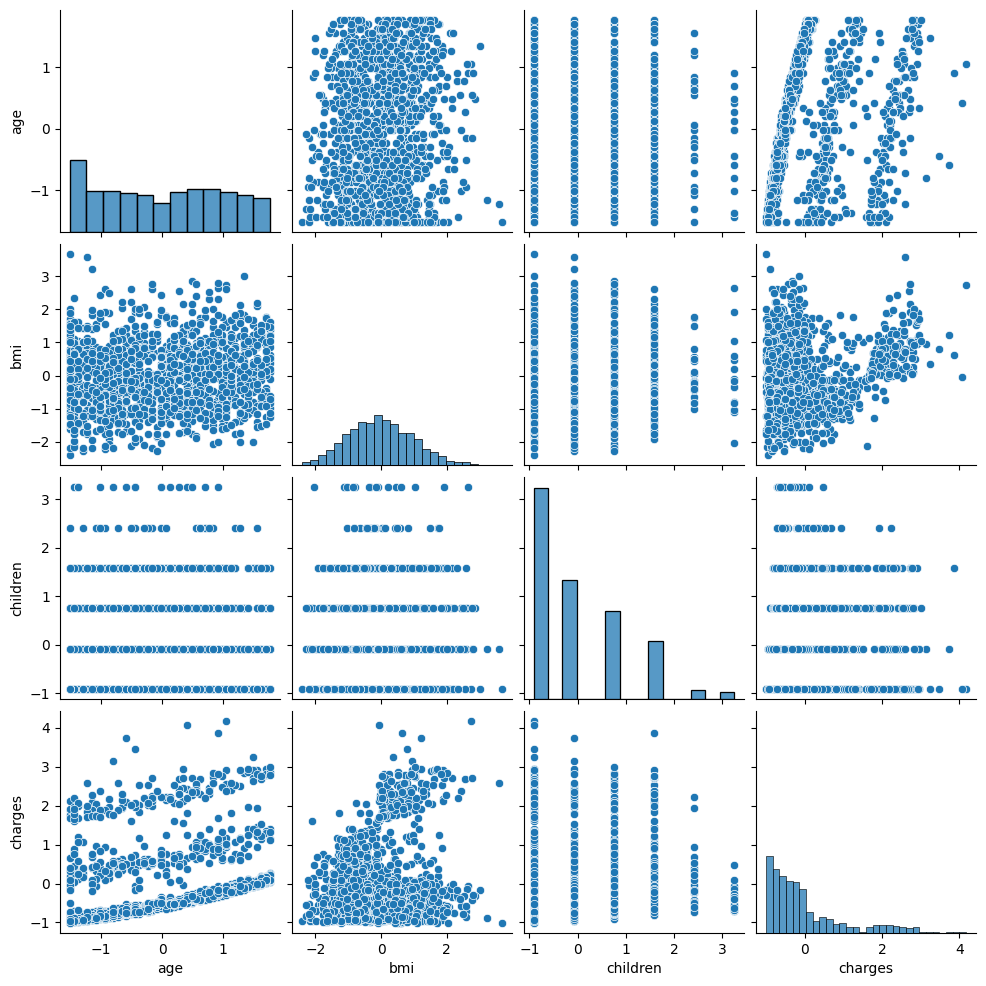

In [3]:
from sklearn.preprocessing import StandardScaler


numeric_cols = df.select_dtypes(include=['number'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols.columns)

sns.pairplot(scaled_df)
plt.show()

# Multiple Linear Regression
using 'charges' as a targeted value

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

target_column = scaled_df.columns[-1]
X = scaled_df.drop(columns=[target_column])
y = scaled_df[target_column]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Regression equotion and Visualization

In [6]:
coefficients = model.coef_
intercept = model.intercept_

equation = f"y = {intercept:.2f}"
for i, col in enumerate(X.columns):
    equation += f" + ({coefficients[i]:.2f} * {col})"
print("Regression Equation:")
print(equation)

Regression Equation:
y = 0.01 + (0.26 * age) + (0.17 * bmi) + (0.06 * children)


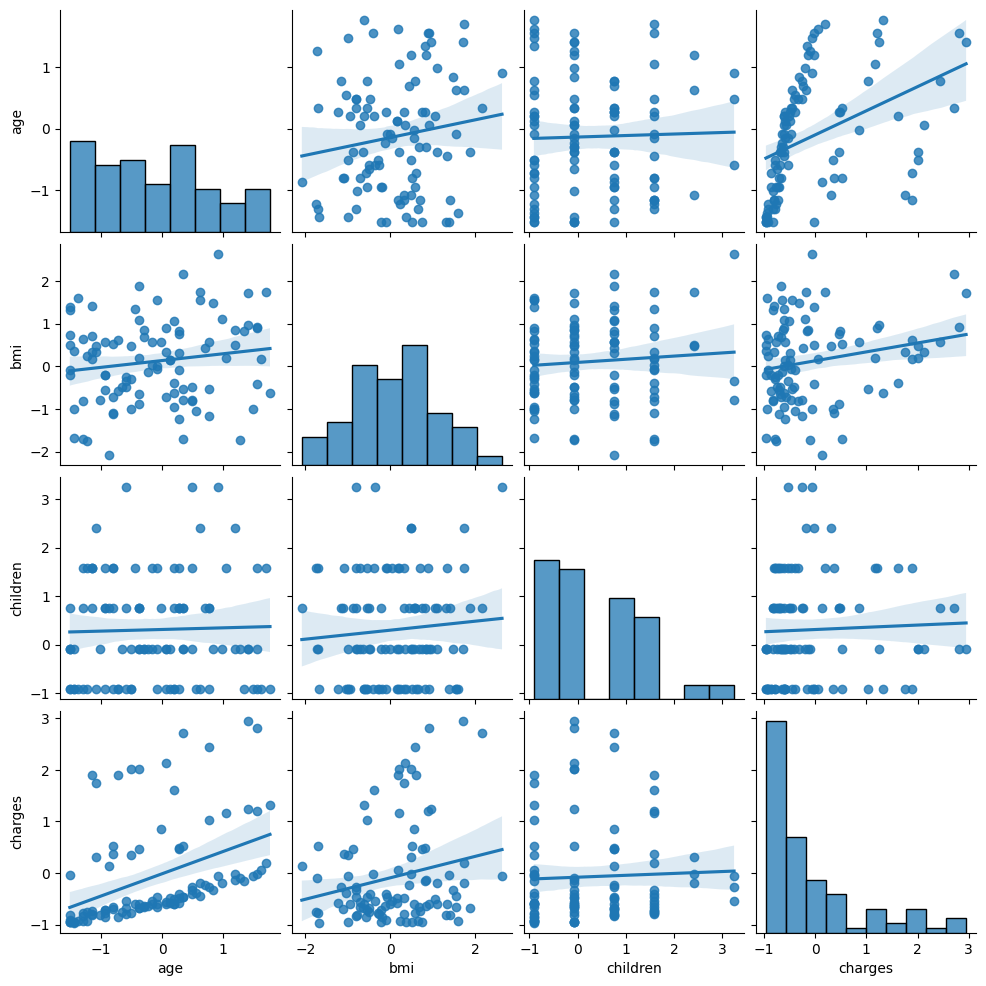

In [7]:
sns.pairplot(scaled_df.sample(100), kind="reg")
plt.show()

# Accuracy check

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rss = np.sum((y_test - y_pred) ** 2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

n = len(y_test)
k = X_train.shape[1]
rse = np.sqrt(rss / (n - k - 1))

tss = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = r2_score(y_test, y_pred)

se_b = np.sqrt(np.diag(np.linalg.inv(X_train.T @ X_train) * (rss / (n - k - 1))))
t_b = model.coef_ / se_b

print(f"RSS: {rss:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"RSE: {rse:.4f}")
print(f"R^2: {r2:.4f}")
for i, coef in enumerate(model.coef_):
    print(f"Coefficient for {X_train.columns[i]}: {coef:.4f}, t_b: {t_b[i]:.4f}")


RSS: 239.9433
RMSE: 0.9462
RSE: 0.9533
R^2: 0.1549
Coefficient for age: 0.2561, t_b: 8.7241
Coefficient for bmi: 0.1673, t_b: 5.6483
Coefficient for children: 0.0560, t_b: 1.9359


Resuts are unsatisfying, since R² is quite high and data points very dence from the regression line and fit is very weak.\
RMSE is close to 1 which is moderate prediction accuracy.\
RSE is close to RMSE so there is no overfitting.\
Age and BMI are signifcant and Children is marginally significant (⁓<2)

# Predicting 3 new values

In [13]:
new_data = np.array([[57, 37, 3,0],
                     [28, 34, 8,0],
                     [75, 40, 1,0]])

scaled_new_data = scaler.transform(new_data)
y_pred_new = model.predict(scaled_new_data[:,:-1])


for i, prediction in enumerate(y_pred_new):
    print(f"Data point {i+1} (age, bmi, children) = {new_data[i][:-1]}, Predicted value = {prediction:.4f} ; [{prediction-rmse}, {prediction+rmse}]")

print(f"\nEstimated RMSE for new predictions: {rmse:.4f}")

Data point 1 (age, bmi, children) = [57 37  3], Predicted value = 0.5927 ; [-0.35347952387575476, 1.5389378682574657]
Data point 2 (age, bmi, children) = [28 34  8], Predicted value = 0.2141 ; [-0.7321083414354967, 1.1603090506977238]
Data point 3 (age, bmi, children) = [75 40  1], Predicted value = 0.9103 ; [-0.0359203060660056, 1.856497086067215]

Estimated RMSE for new predictions: 0.9462


H:\In common\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
H:\In common\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import numpy as np

new_data = np.array([[57, 37, 3, 0],
                     [28, 34, 8, 0],
                     [75, 40, 1, 0]])

scaled_new_data = scaler.transform(new_data)
y_pred_new = model.predict(scaled_new_data[:, :-1])

scaled_new_data[:, -1] = y_pred_new
unscaled_new_data = scaler.inverse_transform(scaled_new_data)

for i, prediction in enumerate(y_pred_new):
    print(f"Data point {i + 1} (age, bmi, children) = {new_data[i][:-1]}, Predicted value = {prediction:.4f} ; [{prediction - rmse}, {prediction + rmse}]")
print(f"\nWhere RMSE is: {rmse:.4f}")

print("\nUnscaled data with predictions:")
print(unscaled_new_data.astype(int))


Data point 1 (age, bmi, children) = [57 37  3], Predicted value = 0.5927 ; [-0.35347952387575476, 1.5389378682574657]
Data point 2 (age, bmi, children) = [28 34  8], Predicted value = 0.2141 ; [-0.7321083414354967, 1.1603090506977238]
Data point 3 (age, bmi, children) = [75 40  1], Predicted value = 0.9103 ; [-0.0359203060660056, 1.856497086067215]

Where RMSE is: 0.9462

Unscaled data with predictions:
[[   57    37     3 20445]
 [   28    34     8 15862]
 [   75    40     1 24289]]


H:\In common\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
H:\In common\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
